In [1]:
import numpy as np
from matplotlib import pyplot as plt

# 1. Exponential random numbers

In [2]:
def draw_exp(b, shape=(1,)):
    """
        Draws from a distribution with pdf l*e^(-l*x).
    """
    return -np.log(np.random.rand(*shape)) / l

In [3]:
def exp_pdf(l, x):
    return l * np.exp(-l * x)

## Test

In [4]:
l = 0.5
N = 10000

In [5]:
draws = draw_exp(l, (N,))

In [6]:
x_max = 10
x = np.linspace(0, x_max, 50)
y_th = exp_pdf(l, x)

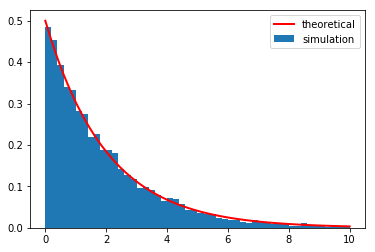

In [7]:
bins = 50

plt.figure()
hist = plt.hist(draws, bins=bins, range=[0, x_max], density=True, label="simulation")
plt.plot(x, y_th, "r", lw=2, label="theoretical")
plt.legend()
plt.show()

# 2. Homogeneous Poisson process

In [8]:
def poisson(l, T):
    """
        Simulate a Poisson process with rate l until time T.
    """
    t = 0
    times = []
    
    while True:
        t += float(draw_exp(l))
        if t > T: break
        times.append(t)
    
    return np.array(times)

## Test

In [9]:
l = 1
T = 100

In [10]:
times = poisson(l, T)
count = np.arange(times.size) + 1

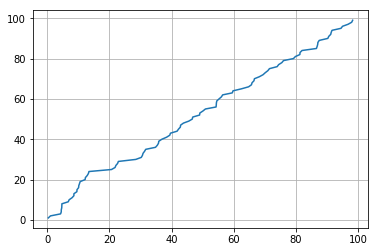

In [11]:
plt.figure()
plt.plot(times, count)
plt.grid()
plt.show()

Distribution:

In [12]:
reps = 50
times = np.concatenate([poisson(l, T) for i in range(reps)])

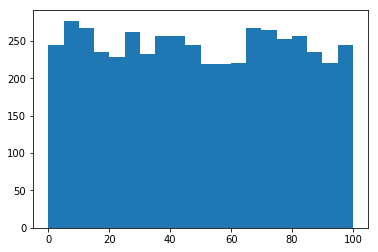

In [13]:
bins = 20

plt.figure()
plt.hist(times, bins=bins)
plt.show()

# 3. Nonhomogeneous Poisson process

In [36]:
def poisson_nh(l_fun, l_max, T):
    """
        Simulate a Poisson process with rate l_fun(t)
        until time T. Please provide l_max
    """
    
    times = poisson(l_max, T)
    
    # apply thinning
    keep = np.random.rand(*times.shape) < l_fun(times) / l_max
    efficiency = np.sum(keep) / times.size
    times = times[keep]
    
    return times, efficiency

## Test

In [15]:
l = 20
l_fun = lambda t: l*np.sin(t) + l
l_max = 2 * l
T = 4 * np.pi

In [28]:
times, _ = poisson_nh(l_fun, l_max, T)
count = np.arange(times.size) + 1

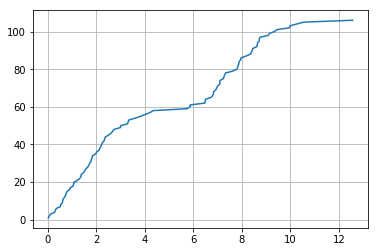

In [29]:
plt.figure()
plt.plot(times, count)
plt.grid()
plt.show()

Distribution:

In [30]:
reps = 50
times = np.concatenate([poisson_nh(l_fun, l_max, T)[0] for i in range(reps)])

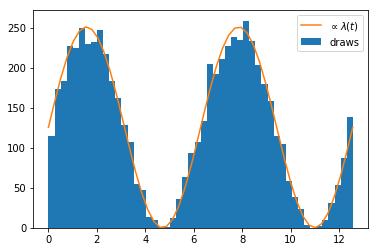

In [31]:
bins = 50

plt.figure()
plt.hist(times, bins=bins, label="draws")
plt.plot(np.linspace(0, T), l_fun(np.linspace(0, T)) * reps * T / bins / 2, label="$\propto\lambda(t)$")

plt.legend()
plt.show()

## Efficiency

In [45]:
reps = 50
efficiency = np.mean([poisson_nh(l_fun, l_max, T)[1] for i in range(reps)])
efficiency

0.5016875792187026